# CORREL8.M8

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('talk',font_scale=.8)
import sys, os, os.path
from scipy.io import wavfile
from scipy import signal

#input_filename_full = input("Input full file name:")
#input_filename_concat = input("Input concat file name:")
input_filename_full = 'full_test.wav'
input_filename_concat = 'short test.wav'
if input_filename_full[-3:] != 'wav':
    print('WARNING!! Input File format should be *.wav')
    sys.exit()
if input_filename_concat[-3:] != 'wav':
    print('WARNING!! Input File format should be *.wav')
    sys.exit()

samrate_full, data_full = wavfile.read(str(input_filename_full))
samrate_concat, data_concat = wavfile.read(str(input_filename_concat))
print('Load is Done! \n')

wavData_full = pd.DataFrame(data_full)
wavData_concat = pd.DataFrame(data_concat)

print('Stereo .wav file\n')
wavData_full.columns = ['R', 'L']
wavData_concat.columns = ['R', 'L']
full = pd.DataFrame(wavData_full['R'])
concat = pd.DataFrame(wavData_concat['R'])

print('Saving...\n')
output_filename_full = input_filename_full[:-4] + '.csv'
output_filename_concat = input_filename_concat[:-4] + '.csv'
            
full.to_csv(str(output_filename_full), mode='w', index=False)
concat.to_csv(str(output_filename_concat), mode='w', index=False)
# wavData.to_csv("Output_stereo_RL.csv", mode='w')
print('Save is done ' + str(output_filename_full) + ' and ' +
                           str(output_filename_concat))

df_full = pd.read_csv(output_filename_full, engine='python')
df_concat = pd.read_csv(output_filename_concat, engine='python')


C:\Users\Adi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: WavFileWarning: Chunk (non-data) not understood, skipping it.


Load is Done! 

Stereo .wav file

Saving...

Save is done full_test.csv and short test.csv


# Time Lagged Cross Correlation

max:  287038898674004
min:  -62798825170228
max cross corr index:  (array([14938535], dtype=int64),)


C:\Users\Adi\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


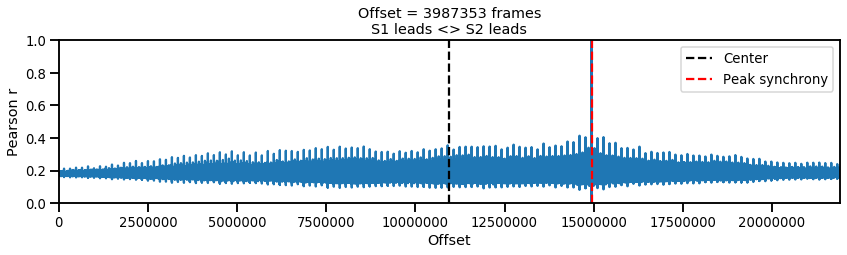

In [3]:
d1 = []
d2 = []
d1 = df_full['R'].values
d2 = df_concat['R'].values

seconds = 495
fps = 44100
rs = signal.correlate(d1, d2, mode='same', method='fft')
print('max: ', max(rs))
print('min: ', min(rs))
print('max cross corr index: ', np.where(rs==max(rs)))
x_max = len(rs)
y_min = min(rs)
y_max = max(rs)
rs = (rs - y_min)/(abs(y_min)+abs(y_max))
offset = int(np.argmax(rs)-np.ceil(len(rs)/2))
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0,1],xlim=[0,x_max], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item) for item in ax.get_xticks()]);
plt.legend()




In [4]:
#frame_offset = int(np.argmax(rs)+1-(data_full.size/2))
concat_arr_out = np.delete(data_full, list(range(0, abs(2*offset))), axis=0)
print(concat_arr_out)
wavfile.write('new_concat.wav', 44100, concat_arr_out)

[[-3208 -1432]
 [-3258 -1686]
 [-3371 -1765]
 ...
 [ -138    95]
 [ -150   105]
 [ -133   102]]
